In [1]:
import json
from pathlib import Path

from bids.layout import BIDSLayout
from bids.modeling import BIDSStatsModelsGraph
from nilearn.plotting import plot_design_matrix

In [2]:
root = 'data/ds000102'
db_path = 'data/ds000102/dbcache'
reset_database = True
spec_path = 'model_specs/ds005_spec.json'

In [3]:
layout = BIDSLayout(root=root, database_path=db_path, reset_database=reset_database)

In [4]:
spec = json.loads(Path(spec_path).read_text())

In [5]:
graph = BIDSStatsModelsGraph(layout, spec)
graph.load_collections(scan_length=292)

### Original `BIDSVariableCollection`

We can take a look at the original variables available for a single subject, prior to running the node (i.e. applying any transformations)

Note, my model spec doesn't query the derivatives at all, so I think that's why they don't show up as options for regressors?  Not sure


In [6]:
root_node = graph.root_node
colls = root_node.get_collections()
first_sub = colls[0]

# This is what there is to work with in the transformations

In [7]:
first_sub.to_df(entities=False)

,duration,onset,Rsponse,StimVar,Stimulus,cond,correctness,response_time,trial_type
0,2.0,0.0,1,2,incongruent,cond003,correct,1.095,incongruent_correct
1,2.0,10.0,1,2,incongruent,cond003,correct,0.988,incongruent_correct
2,2.0,20.0,1,1,congruent,cond001,correct,0.591,congruent_correct
3,2.0,30.0,1,1,congruent,cond001,correct,0.499,congruent_correct
4,2.0,40.0,1,2,incongruent,cond003,correct,0.719,incongruent_correct
5,2.0,52.0,1,1,congruent,cond001,correct,0.544,congruent_correct
6,2.0,64.0,1,1,congruent,cond001,correct,0.436,congruent_correct
7,2.0,76.0,1,2,incongruent,cond003,correct,0.47,incongruent_correct
8,2.0,88.0,1,1,congruent,cond001,correct,0.409,congruent_correct
9,2.0,102.0,1,2,incongruent,cond003,correct,0.563,incongruent_correct


### Variables that can be used as Input for the first transformation

In [8]:
first_sub.variables

{'Stimulus': <SparseRunVariable(name='Stimulus', source='events')>,
 'response_time': <SparseRunVariable(name='response_time', source='events')>,
 'correctness': <SparseRunVariable(name='correctness', source='events')>,
 'trial_type': <SparseRunVariable(name='trial_type', source='events')>,
 'cond': <SparseRunVariable(name='cond', source='events')>,
 'StimVar': <SparseRunVariable(name='StimVar', source='events')>,
 'Rsponse': <SparseRunVariable(name='Rsponse', source='events')>}

### There are currently no dense variables (defined for each TR).  I assume the derivatives would show up here.

In [9]:
first_sub.get_dense_variables()

[]

### Running the node (and applying transformations)

These are the `Transformations` that wil be applied:

In [10]:
graph.model['nodes'][0]['transformations']

{'transformer': 'pybids-transforms-v1',
 'instructions': [{'name': 'Factor', 'input': ['trial_type']},
  {'name': 'Convolve', 'input': ['trial_type.*'], 'model': 'spm'}]}

In [11]:
outputs = root_node.run(
    group_by=root_node.group_by, force_dense=False, transformation_history=True
)

We get a `BIDSStatsModelsNodeOutput` for every run/subject
(I only included 1 run and 1 subject)

In [12]:
outputs

[<BIDSStatsModelsNodeOutput(name=Within-run, entities={'run': 1, 'subject': '01'})>]

In [13]:
first_output = outputs[0]
first_output

<BIDSStatsModelsNodeOutput(name=Within-run, entities={'run': 1, 'subject': '01'})>

In [14]:
first_output.X

,trial_type.incongruent_correct,trial_type.congruent_correct
0,0.000237,-2.315591e-07
1,0.019500,5.984825e-07
2,0.235208,-1.519282e-06
3,0.409155,3.781591e-06
4,0.302822,-9.203388e-06
...,...,...
141,-0.008920,1.535516e-01
142,-0.004247,4.101327e-02
143,-0.001835,-1.521101e-02
144,-0.000712,-3.507690e-02


<Axes: label='conditions', ylabel='scan number'>

/Users/jeanettemumford/Dropbox/Research/Projects/Michael/bids_sm_transformation/.venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  func(*args, **kwargs)
/Users/jeanettemumford/Dropbox/Research/Projects/Michael/bids_sm_transformation/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


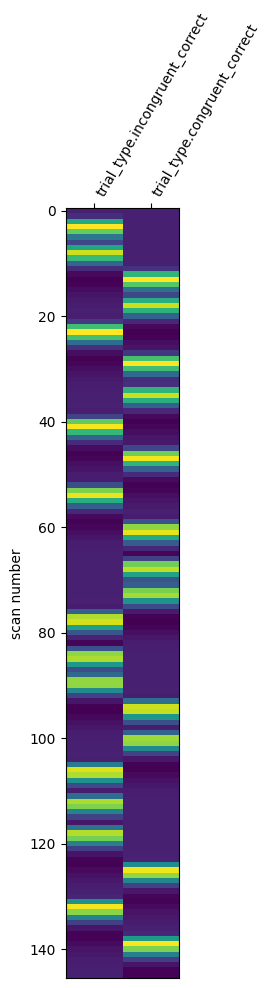

In [15]:
plot_design_matrix(first_output.X)

## Transformation history
You can break it down by each transformation too!

In [16]:
trans_hist = first_output.trans_hist
trans_hist

[TransformationOutput(index=0, output=<BIDSRunVariableCollection['Rsponse', 'StimVar', 'Stimulus', 'cond', 'correctness', 'response_time', 'trial_type']>, transformation_name=None, transformation_kwargs=None, input_cols=None, level=None),
 TransformationOutput(index=1, output=<BIDSRunVariableCollection['Rsponse', 'StimVar', 'Stimulus', 'cond', 'correctness', 'response_time', 'trial_type.congruent_correct', 'trial_type.incongruent_correct']>, transformation_name='Factor', transformation_kwargs={}, input_cols=['trial_type'], level='run'),
 TransformationOutput(index=2, output=<BIDSRunVariableCollection['Rsponse', 'StimVar', 'Stimulus', 'cond', 'correctness', 'response_time', 'trial_type.congruent_correct', 'trial_type.incongruent_correct']>, transformation_name='Convolve', transformation_kwargs={'model': 'spm'}, input_cols=['trial_type.*'], level='run')]

In [17]:
# First one
print(trans_hist[0])

print(trans_hist[0].output)

TransformationOutput(index=0, output=<BIDSRunVariableCollection['Rsponse', 'StimVar', 'Stimulus', 'cond', 'correctness', 'response_time', 'trial_type']>, transformation_name=None, transformation_kwargs=None, input_cols=None, level=None)
<BIDSRunVariableCollection['Rsponse', 'StimVar', 'Stimulus', 'cond', 'correctness', 'response_time', 'trial_type']>


### Important note
The following will output both sparse and dense.  In this case there are only sparse variables.  As you'll below (after convolution) the sparse variables will be made into dense (so they can all be present in the same dataframe) and that can be a bit confusing (IMHO).

In [18]:
trans_hist[0].output.to_df(entities=False)

,duration,onset,Rsponse,StimVar,Stimulus,cond,correctness,response_time,trial_type
0,2.0,0.0,1,2,incongruent,cond003,correct,1.095,incongruent_correct
1,2.0,10.0,1,2,incongruent,cond003,correct,0.988,incongruent_correct
2,2.0,20.0,1,1,congruent,cond001,correct,0.591,congruent_correct
3,2.0,30.0,1,1,congruent,cond001,correct,0.499,congruent_correct
4,2.0,40.0,1,2,incongruent,cond003,correct,0.719,incongruent_correct
5,2.0,52.0,1,1,congruent,cond001,correct,0.544,congruent_correct
6,2.0,64.0,1,1,congruent,cond001,correct,0.436,congruent_correct
7,2.0,76.0,1,2,incongruent,cond003,correct,0.47,incongruent_correct
8,2.0,88.0,1,1,congruent,cond001,correct,0.409,congruent_correct
9,2.0,102.0,1,2,incongruent,cond003,correct,0.563,incongruent_correct


### What did the first transformation (Factor) do?

Recall that, by default, the `duration` and `onset` columns will be used for the durations/onsets and so the values in, for example, `trial_type.congruent_correct` are essentially modulations if you choose to convolve (where 0 is going to represent nothing happening).

In [19]:
trans_hist[1].output.to_df(entities=False)

,duration,onset,Rsponse,StimVar,Stimulus,cond,correctness,response_time,trial_type.congruent_correct,trial_type.incongruent_correct
0,2.0,0.0,1,2,incongruent,cond003,correct,1.095,0.0,1.0
1,2.0,10.0,1,2,incongruent,cond003,correct,0.988,0.0,1.0
2,2.0,20.0,1,1,congruent,cond001,correct,0.591,1.0,0.0
3,2.0,30.0,1,1,congruent,cond001,correct,0.499,1.0,0.0
4,2.0,40.0,1,2,incongruent,cond003,correct,0.719,0.0,1.0
5,2.0,52.0,1,1,congruent,cond001,correct,0.544,1.0,0.0
6,2.0,64.0,1,1,congruent,cond001,correct,0.436,1.0,0.0
7,2.0,76.0,1,2,incongruent,cond003,correct,0.47,0.0,1.0
8,2.0,88.0,1,1,congruent,cond001,correct,0.409,1.0,0.0
9,2.0,102.0,1,2,incongruent,cond003,correct,0.563,0.0,1.0


### Second transformation (Convolve)
Now things will be dense and I find the data frame to be a bit confusing for things that have not been convolved yet.  Code to display dense only or sparse only is below.

Note, the time (essentially the index) is a finer resolution than the TR, but as we know from looking at X above, it must downsample to the TR when making the design matrix. (Just a guess)


In [20]:
trans_hist[2].output.to_df(entities=False)

,duration,onset,Rsponse,StimVar,response_time,trial_type.congruent_correct,trial_type.incongruent_correct
0,0.1,0.0,1.0,2.0,1.095,0.000000,0.000000e+00
1,0.1,0.1,1.0,2.0,1.095,0.000000,3.036578e-21
2,0.1,0.2,1.0,2.0,1.095,0.000000,9.361469e-09
3,0.1,0.3,1.0,2.0,1.095,0.000000,2.782321e-07
4,0.1,0.4,1.0,2.0,1.095,0.000000,2.120296e-06
...,...,...,...,...,...,...,...
2915,0.1,291.5,0.0,0.0,0.000,-0.036285,-3.263695e-04
2916,0.1,291.6,0.0,0.0,0.000,-0.036060,-3.101906e-04
2917,0.1,291.7,0.0,0.0,0.000,-0.035811,-2.947660e-04
2918,0.1,291.8,0.0,0.0,0.000,-0.035537,-2.800633e-04


In [21]:
# If you only want to see the dense variables, you can do this
trans_hist[2].output.to_df(entities=False, include_sparse=False)

,duration,onset,trial_type.congruent_correct,trial_type.incongruent_correct
0,0.1,0.0,0.000000,0.000000e+00
1,0.1,0.1,0.000000,3.036578e-21
2,0.1,0.2,0.000000,9.361469e-09
3,0.1,0.3,0.000000,2.782321e-07
4,0.1,0.4,0.000000,2.120296e-06
...,...,...,...,...
2915,0.1,291.5,-0.036285,-3.263695e-04
2916,0.1,291.6,-0.036060,-3.101906e-04
2917,0.1,291.7,-0.035811,-2.947660e-04
2918,0.1,291.8,-0.035537,-2.800633e-04


In [22]:
# If you only want to see the sparse variables in sparse form, you can do this
trans_hist[2].output.to_df(entities=False, include_dense=False)

,duration,onset,Rsponse,StimVar,Stimulus,cond,correctness,response_time
0,2.0,0.0,1,2,incongruent,cond003,correct,1.095
1,2.0,10.0,1,2,incongruent,cond003,correct,0.988
2,2.0,20.0,1,1,congruent,cond001,correct,0.591
3,2.0,30.0,1,1,congruent,cond001,correct,0.499
4,2.0,40.0,1,2,incongruent,cond003,correct,0.719
5,2.0,52.0,1,1,congruent,cond001,correct,0.544
6,2.0,64.0,1,1,congruent,cond001,correct,0.436
7,2.0,76.0,1,2,incongruent,cond003,correct,0.47
8,2.0,88.0,1,1,congruent,cond001,correct,0.409
9,2.0,102.0,1,2,incongruent,cond003,correct,0.563
